<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Content</h3>

* [1. Libraries](#1)
* [2. Reading and Exploring the Data](#2)
* [3. Exploratory Data Analysis](#3)
    - [3.1 Total Orders of Superstore Over Time](#3.1)
    - [3.2 Total Orders Comparison Between 2014 and 2017 (Jan to Dec)](#3.2)
    - [3.3 Main Segment of Superstore's Customer](#3.3)
    - [3.4 Sales and Quantity Performance by Segment](#3.4)
    - [3.5 Total Orders by Region, City and State](#3.5)
    - [3.6 Main Category of Product Ordered](#3.6)  
    - [3.7 Top 10 Products Ordered in Superstores](#3.7)
* [4. Conclusion of the EDA](#4)

In this notebook, we will go through a complete exploratory data analysis on the Superstore Dataset on [Kaggle](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final). The objective of this analysis is to provide data insights to the Superstore owners who are planning to grow the store sales and get a better understanding on the customer behaviour by analyzing the historical sales data from 2014 to 2017.

<a id="1"></a>
<font color="darkslateblue" size=+2.5><b>1. Libraries</b></font>

In [1]:
!pip install xplotter --upgrade

In [2]:
# Libraries
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid.inset_locator import InsetPosition

# Utils modules
from viz_utils import *

# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

<a id="2"></a>
<font color="darkslateblue" size=+2.5><b>2. Reading and Exploring the Data</b></font>

In [3]:
# Reading Superstore dataset
df_stores=pd.read_csv("../input/superstore-dataset-final/Sample - Superstore.csv", encoding='latin-1', index_col=0)

# Data shape results for Superstore Dataset
print(f'Orders Dataset shape: {df_stores.shape}')
df_stores.head()

Orders Dataset shape: (9994, 20)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


By checking the data shape results, now we know that there are total of 9994 rows with 20 columns in the Superstore Dataset, here's the explanation of the columns:

* **Order ID:** contains the Unique Order ID for each Customer
* **Order Date:** contains the Order Date of the product
* **Ship Date:** contains the Shipping Date of the Product
* **Ship Mode:** contains the Shipping Mode specified by the Customer
* **Customer ID:** contains the Unique ID to identify each Customer
* **Customer Name:** contains the Name of the Customer
* **Segment:** contains the segment where the Customer belongs
* **Country:** contains the Country of residence of the Customer
* **City:** contains the City of residence of of the Customer
* **State:** contains the State of residence of the Customer
* **Postal Code:** contains the Postal Code of every Customer
* **Region:** contains the Region where the Customer belong
* **Product ID:** contains the Unique ID of the Product
* **Category:** contains the Category of the product ordered
* **Sub-Category:** contains the Sub-Category of the product ordered
* **Product Name:** contains the Name of the Product
* **Sale:** contains the Sales of the Product
* **Quantity:** contains the Quantity of the Product
* **Discount:** contains the Discount providedv
* **Profit:** Profit/Loss incurred

In [4]:
# Inspect the Superstore dataset
print(df_stores.index.is_unique)
print(df_stores.columns.is_unique)
print(df_stores[df_stores.duplicated() == True])

True
True
              Order ID Order Date  Ship Date       Ship Mode Customer ID  \
Row ID                                                                     
3407    US-2014-150119  4/23/2014  4/27/2014  Standard Class    LB-16795   

         Customer Name      Segment        Country      City State  \
Row ID                                                               
3407    Laurel Beltran  Home Office  United States  Columbus  Ohio   

        Postal Code Region       Product ID   Category Sub-Category  \
Row ID                                                                
3407          43229   East  FUR-CH-10002965  Furniture       Chairs   

                                             Product Name    Sales  Quantity  \
Row ID                                                                         
3407    Global Leather Highback Executive Chair with P...  281.372         2   

        Discount   Profit  
Row ID                     
3407         0.3 -12.0588  


In [5]:
# Drop All Duplicate rows
df_stores = df_stores.drop_duplicates(keep=False)

# Check again if there's still duplicate row
print(df_stores[df_stores.duplicated() == True])

Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []


In [6]:
# Check if there's missing values for the Superstore dataset
print(df_stores.isna())

        Order ID  Order Date  Ship Date  Ship Mode  Customer ID  \
Row ID                                                            
1          False       False      False      False        False   
2          False       False      False      False        False   
3          False       False      False      False        False   
4          False       False      False      False        False   
5          False       False      False      False        False   
...          ...         ...        ...        ...          ...   
9990       False       False      False      False        False   
9991       False       False      False      False        False   
9992       False       False      False      False        False   
9993       False       False      False      False        False   
9994       False       False      False      False        False   

        Customer Name  Segment  Country   City  State  Postal Code  Region  \
Row ID                                            

As noted as above, there's no missing values for the Superstore dataset, we can now move on to EDA.

<a id="3"></a>
<font color="darkslateblue" size=+2.5><b>3. Exploratory Data Analysis</b></font>

Okay now the dataset is ready to go, let's have our exploratory data analysis and get the data insights from the Superstore dataset. The objective here is to perform a deep dive analysis on columns we have to understand the customer behaviour such as order date by week/month, customer's type (which segment do they mainly belong to), which category of the product is the most popular choice, and also the customer's product preference if they are from different background (country/city) etc. 

<a id="3.1"></a>
<font color="dimgrey" size=+2.0><b>3.1 Total Orders of Superstore Over Time</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Since our Order Date column is in normal date form, to perform a deep dive analysis on customer's time ordering behaviour, it's advised to break them into small pieces such as year, month, and even the day of week it belongs to for easier data insights to get.

In [7]:
# Changing the data type for date columns
timestamp_cols = ['Order Date']
for col in timestamp_cols:
    df_stores[col] = pd.to_datetime(df_stores[col])
    
# Extracting attributes for Order date - Year and Month
df_stores['order_date_year'] = df_stores['Order Date'].apply(lambda x: x.year)
df_stores['order_date_month'] = df_stores['Order Date'].apply(lambda x: x.month)
df_stores['order_date_month_name'] = df_stores['Order Date'].apply(lambda x: x.strftime('%b'))
df_stores['order_date_year_month'] = df_stores['Order Date'].apply(lambda x: x.strftime('%Y%m'))
df_stores['order_date'] = df_stores['Order Date'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for Order date - Day and Day of Week
df_stores['order_date_day'] = df_stores['Order Date'].apply(lambda x: x.day)
df_stores['order_date_dayofweek'] = df_stores['Order Date'].apply(lambda x: x.dayofweek)
df_stores['order_date_dayofweek_name'] = df_stores['Order Date'].apply(lambda x: x.strftime('%a'))

# New Superstore DataFrame after transformations
df_stores.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Discount,Profit,order_date_year,order_date_month,order_date_month_name,order_date_year_month,order_date,order_date_day,order_date_dayofweek,order_date_dayofweek_name
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,0.00,41.9136,2016,11,Nov,201611,20161108,8,1,Tue
2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,0.00,219.5820,2016,11,Nov,201611,20161108,8,1,Tue
3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,0.00,6.8714,2016,6,Jun,201606,20160612,12,6,Sun
4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,0.45,-383.0310,2015,10,Oct,201510,20151011,11,6,Sun
5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,0.20,2.5164,2015,10,Oct,201510,20151011,11,6,Sun


Let's plot three graphs to answer following questions:
1. Was there any growing trend on Superstore's number of orders?
2. Throughout the week, which day of week customers ordered the most from Superstore?
3. Which month customers ordered the most from Superstores?

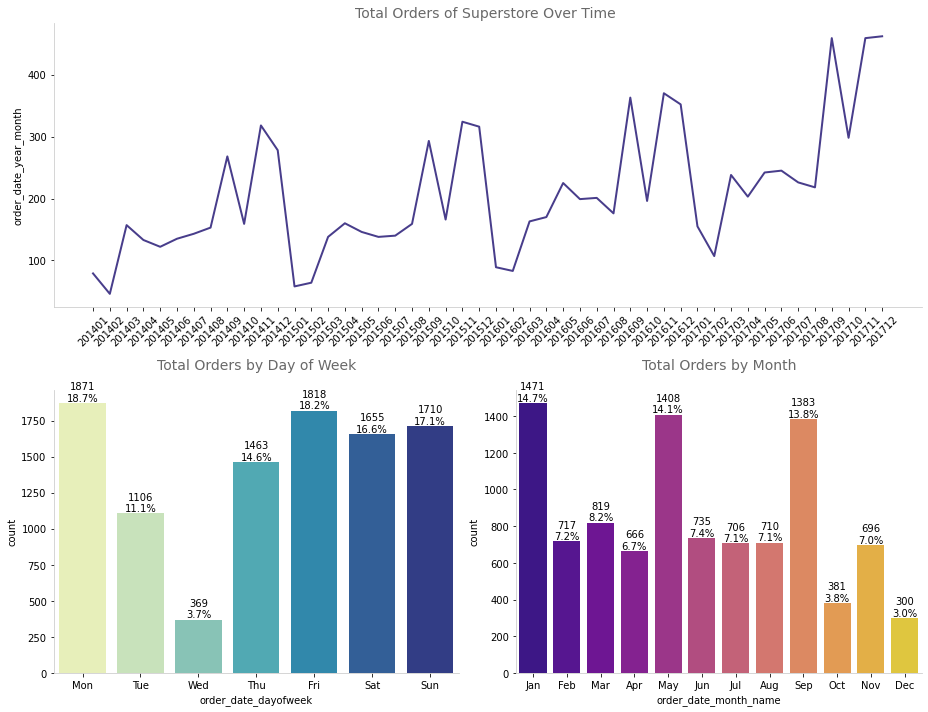

In [8]:
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Total Orders of Superstore Over Time 
sns.lineplot(data=df_stores['order_date_year_month'].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2)

format_spines(ax1, right_border=False)
  
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Total Orders of Superstore Over Time ', size=14, color='dimgrey')

# Barchart - Total Orders by Day of Week
single_countplot(df_stores, x='order_date_dayofweek', ax=ax2, order=False, palette='YlGnBu')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

# Barchart - Total Orders by Month
single_countplot(df_stores, x='order_date_month_name', ax=ax3, order=False)
monthname_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax3.set_xticklabels(monthname_label)
ax3.set_title('Total Orders by Month', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

From the graphs above, we can observe that:
* Superstore's orders had a growing trend starting from 2014 to 2017, the number of orders were **almost 4 times more in 2017 compared to 2014**. 
* In each year, there were **two month spikes** whether customer ordered the most, one was **September**, another one was **November**.
* **Monday** was the day that customers mainly ordered from the Superstore throughout the week.
* **January**, **May**, and **September** were three distinct months that customers ordered the most.

<a id="3.2"></a>
<font color="dimgrey" size=+2.0><b>3.2 Total Orders Comparison Between 2014 and 2017 (Jan to Dec)</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

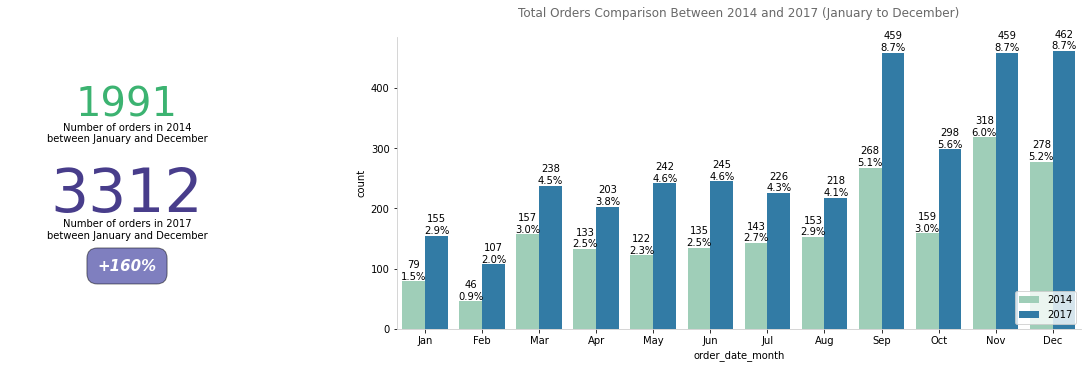

In [9]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 5))

# Axis definition
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# Annotation - Grown on Superstore's orders between 2014 and 2017
df_stores_compare = df_stores.query('order_date_year in (2014, 2017) & order_date_month <=12')
year_orders = df_stores_compare['order_date_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2014] / year_orders[2017]), 0))
ax1.text(0.35, 0.73, f'{year_orders[2014]}', fontsize=40, color='mediumseagreen', ha='center')
ax1.text(0.35, 0.64, 'Number of orders in 2014\nbetween January and December', fontsize=10, ha='center')
ax1.text(0.35, 0.40, f'{year_orders[2017]}', fontsize=60, color='darkslateblue', ha='center')
ax1.text(0.35, 0.31, 'Number of orders in 2017\nbetween January and December', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax1.text(0.35, 0.20, f'{signal}{growth}%', fontsize=15, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax1.axis('off')

# Bar chart - Comparison between monthly sales between 2014 and 2017
single_countplot(df_stores_compare, x='order_date_month', hue='order_date_year', ax=ax2, order=False,
                 palette='YlGnBu')
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.set_xticklabels(month_label)
ax2.set_title('Total Orders Comparison Between 2014 and 2017 (January to December)', size=12, color='dimgrey', pad=20)
plt.legend(loc='lower right')
plt.show()

From the graph above, we can observe that:
* The total orders of 2017 has grown **over 160%** from 2014's 1991 orders to 2017's 3312 orders.
* **September** and **December** were the months with the **largest growth (3.6% & 3.5%)** compared with other months. It's advised to check which products/customers contributed to this growth in these two months. 


<a id="3.3"></a>
<font color="dimgrey" size=+2.0><b>3.3 Main Segment of Superstore's Customer</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Text(0.5, 1.0, 'Customer Type by Segment')

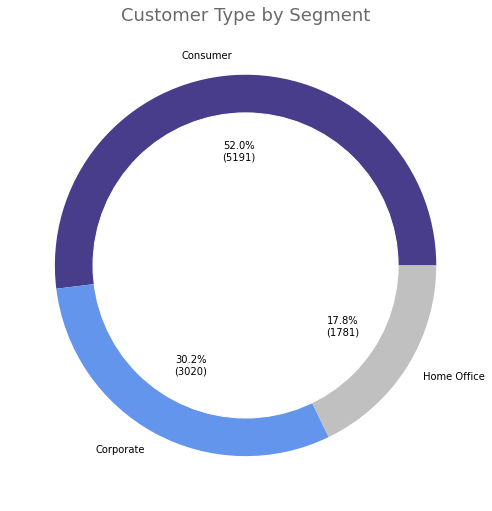

In [10]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(20, 9))

# Axis definition with GridSpec
gs = GridSpec(1, 3, figure=fig)
ax = fig.add_subplot(gs[0,0])

# Donut Plot - Customer Type by Segment
colors = ['darkslateblue', 'cornflowerblue', 'silver']
label_names = df_stores['Segment'].value_counts().index
donut_plot(df_stores, col='Segment', ax=ax, label_names=label_names, colors=colors)
ax.set_title(f'Customer Type by Segment', color='dimgrey', size=18)

The main segment of customers were **Consumer** with around **52.0%**, only 30.2% were from Corporate segment and 17.8% were from Home Office segment. 

Although Consumer was the main segment in overall picture, it's also worth to check on the Sales and Quantity performance of these segments for Superstore owners to have an clear idea which segment should they target more to earn more sales. 

<a id="3.4"></a>
<font color="dimgrey" size=+2.0><b>3.4 Sales and Quantity Performance by Segment</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

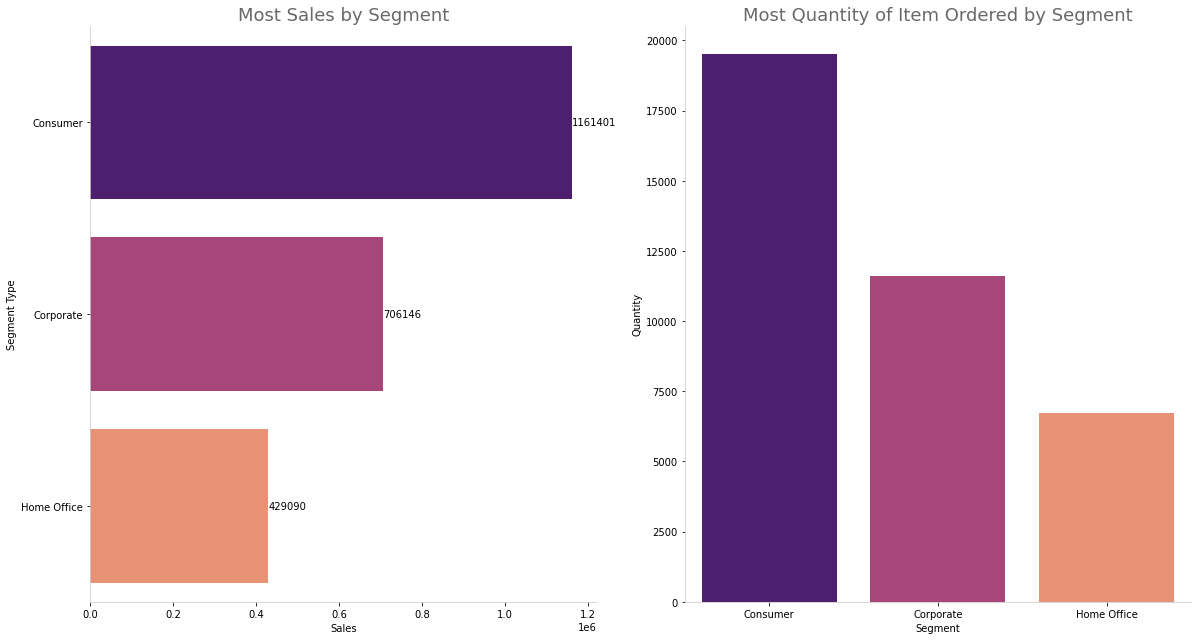

In [11]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(25, 9))

# Axis definition with GridSpec
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1:2])

# Grouping data by Segment with Sales
df_segment_sales = df_stores.groupby(by='Segment', as_index=False).sum().loc[:, ['Segment', 'Sales']]
df_segment_sales = df_segment_sales.sort_values(by='Sales', ascending=False).reset_index(drop=True)

# Most Sales by Segment
sns.barplot(y='Segment', x='Sales', data=df_segment_sales, ax=ax1, palette='magma')
AnnotateBars(n_dec=0, font_size=10, color='black').horizontal(ax1)
format_spines(ax1, right_border=False)
ax1.set_title('Most Sales by Segment', size=18, color='dimgrey')
ax1.set_ylabel('Segment Type')

# Grouping data by Segment with Quantity
df_segment_quantity = df_stores.groupby(by='Segment', as_index=False).sum().loc[:, ['Segment', 'Quantity']]

# Most Quantity of Item Ordered by Segment
sns.barplot(y='Quantity', x='Segment', data=df_segment_quantity, ax=ax2, palette='magma')
format_spines(ax2, right_border=False)
ax2.set_title('Most Quantity of Item Ordered by Segment', size=18, color='dimgrey')
ax2.set_ylabel('Quantity')

plt.tight_layout()
plt.show()

From the graphs above, we can conclude that:
* **Consumer segment** represented the **Most Sales** and they ordered the **Most Quantity** of item across all segments. Therefore, Superstore's owners should further target Consumer segment's customers when setting sales and marketing strategy.

<a id="3.5"></a>
<font color="dimgrey" size=+2.0><b>3.5 Total Orders by Region, City and State </b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Let's move on to check the customer segmentation by geographic, firstly let's group the data by region and city.

In [12]:
# Grouping data by Region
df_region = df_stores.groupby(by=['order_date_year_month', 'Region'], as_index=False)
df_region = df_region.agg({'Order ID': 'count', 'Sales': 'sum'}).sort_values(by='order_date_year_month')
df_region.columns = ['order_date_year_month', 'Region', 'Order ID', 'Sales']
df_region.reset_index(drop=True, inplace=True)

# Grouping data by City (Top 10)
df_city_group = df_stores.groupby(by='City', 
                                       as_index=False).count().loc[:, ['City', 'Order ID']]
df_city_group = df_city_group.sort_values(by='Order ID', ascending=False).reset_index(drop=True)
df_city_group = df_city_group.iloc[:10, :]

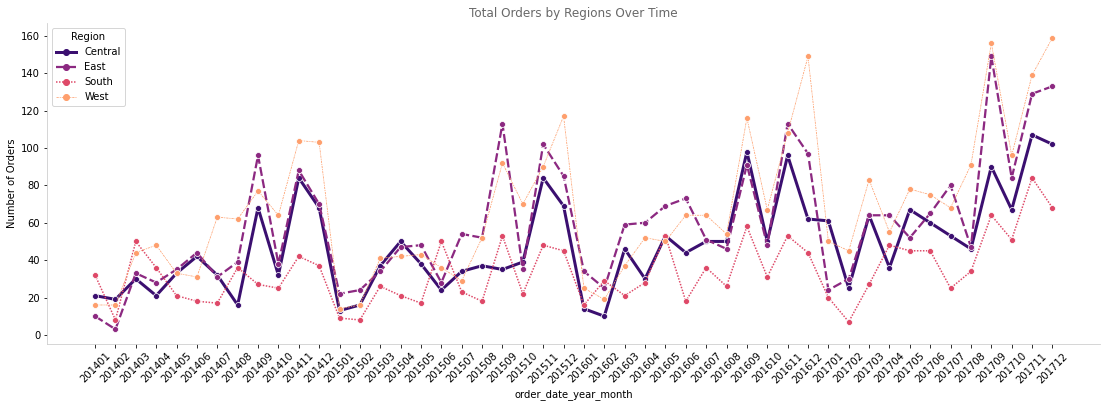

In [13]:
# Creating and preparing figure and axis
fig = plt.figure(constrained_layout=True, figsize=(30, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

# Total Orders by Regions Over Time
sns.lineplot(x='order_date_year_month', y='Order ID', ax=ax1, data=df_region, hue='Region', 
             size='Region', style='Region', palette='magma', markers=['o'] * 4)
format_spines(ax1, right_border=False)
ax1.set_title('Total Orders by Regions Over Time', size=12, color='dimgrey')
ax1.set_ylabel('Number of Orders')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

From the graph above, we can observe that:
* **West region** represented **the Most Orders** over time from 2014 to 2017.

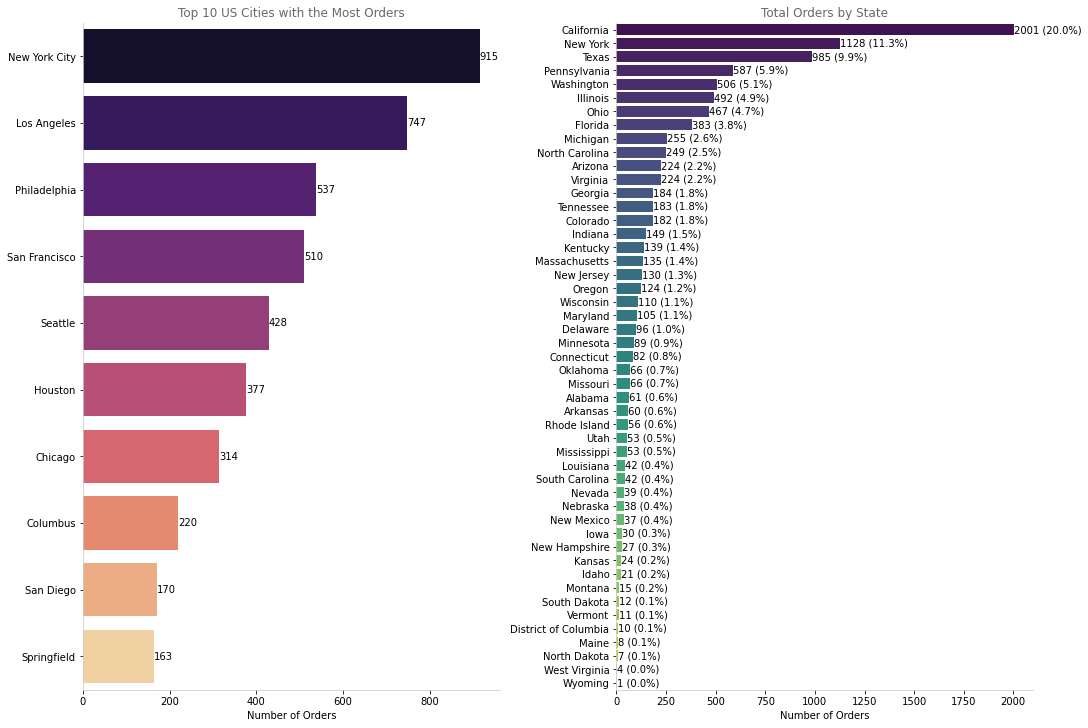

In [14]:
# Creating and preparing figure and axis
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(1, 2, figure=fig)
ax2 = fig.add_subplot(gs[0, 0])
ax3 = fig.add_subplot(gs[0,1:2])

# Top 10 US Cities with the Most Orders
sns.barplot(y='City', x='Order ID', data=df_city_group, ax=ax2, palette='magma')
AnnotateBars(n_dec=0, font_size=10, color='black').horizontal(ax2)
format_spines(ax2, right_border=False)
ax2.set_title('Top 10 US Cities with the Most Orders', size=12, color='dimgrey')
ax2.set_ylabel('')
ax2.set_xlabel('Number of Orders')

# Total orders by state
single_countplot(y='State', ax=ax3, df=df_stores, palette='viridis')
ax3.set_title('Total Orders by State', size=12, color='dimgrey')
ax3.set_ylabel('')
ax3.set_xlabel('Number of Orders')

plt.show()

From the graphs above, we can observe that:
* The Top 3 Cities of Most Orders were: **New York City**, **Los Angeles**, and **Philadelphia**.
* The Top 3 States of Mos Orders were: **California**, **New York**, and **Texas**. 

<a id="3.6"></a>
<font color="dimgrey" size=+2.0><b>3.6 Main Category of Product Ordered</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Text(0.5, 1.0, 'Category of Product Ordered')

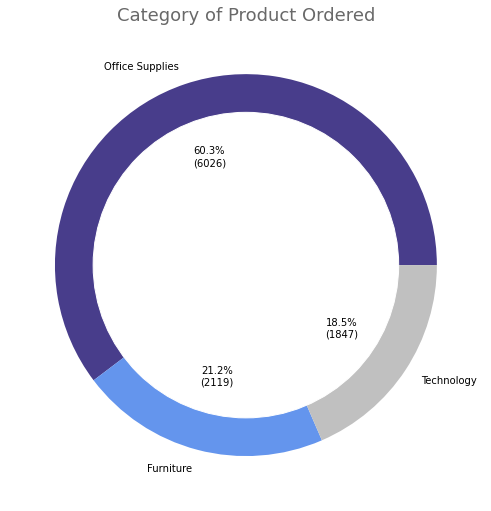

In [15]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(20, 9))

# Axis definition with GridSpec
gs = GridSpec(1, 3, figure=fig)
ax = fig.add_subplot(gs[0,0])

# Donut Plot - Customer Type by Segment
colors = ['darkslateblue', 'cornflowerblue', 'silver']
label_names = df_stores['Category'].value_counts().index
donut_plot(df_stores, col='Category', ax=ax, label_names=label_names, colors=colors)
ax.set_title(f'Category of Product Ordered', color='dimgrey', size=18)

The main category of product ordered were **Office Supplies** with around **60.3%**, only 21.2% were Furniture and 18.5% were Technology. 

<a id="3.7"></a>
<font color="dimgrey" size=+2.0><b>3.7 Top 10 Products Ordered in Superstores</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Now we know that customers mainly bought Office Supplies products in Superstores, let's check which were the Top 10 Products Ordered in Superstores.

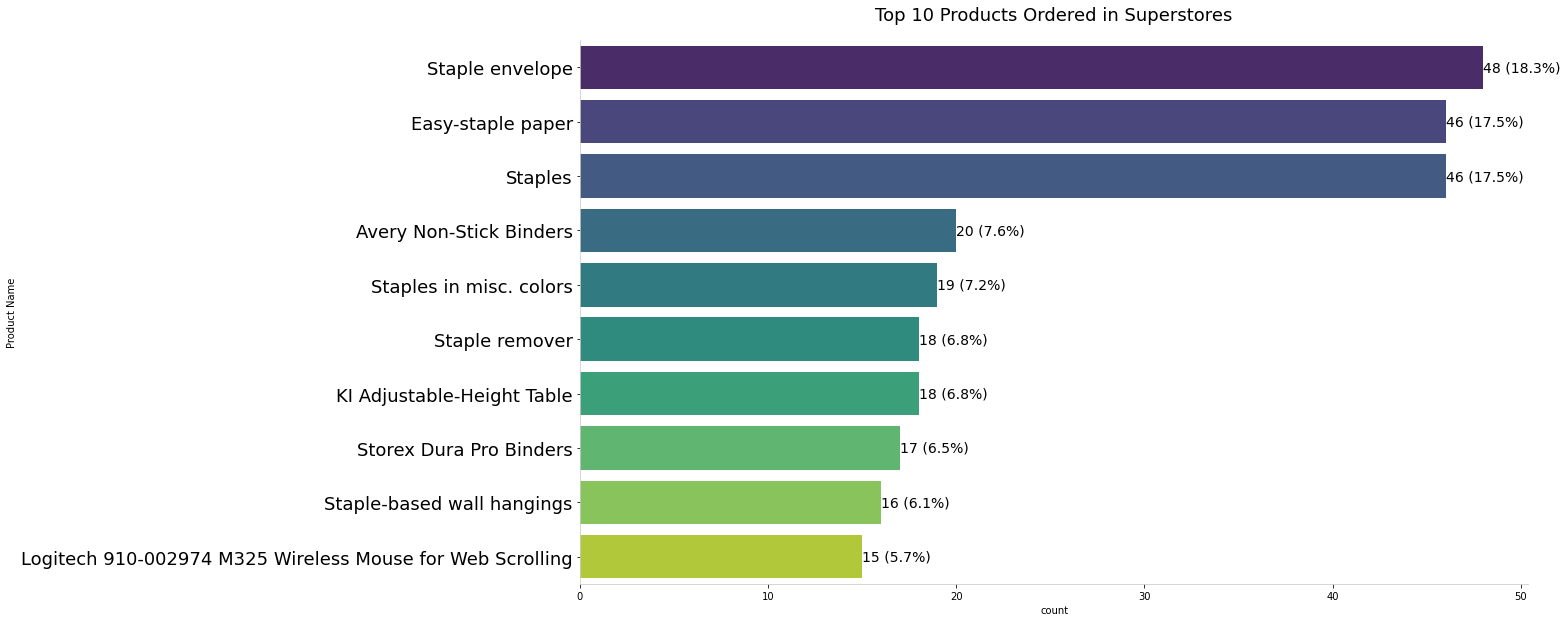

In [16]:
# Top 10 Products Ordered in Superstores
plot_countplot(df=df_stores, col='Product Name', top=10, orient='h', order=True, figsize=(17, 10), palette='viridis',
               title='Top 10 Products Ordered in Superstores', size_title=18)
plt.yticks(fontsize=(18))
plt.show()

From the graphs above, we can observe that:
* The Top 3 Products were: **Staple envelope**, **Easy-staple paper**, and **Staples**.
* Out of the Top 10 Products, it seems that most customers liked to order **Staples related products** from Superstores. 

<a id="4"></a>
<font color="darkslateblue" size=+2.5><b>4. Conclusion of the EDA</b></font>

To conclude, if you are the Superstores owner who is planning to grow the store sales and get a better understanding on the customer behaviour to set up your own sales and marketing strategy, I suggest you should target **Consumer segment customer** as they represented the most sales & quantity of items ordered across all segments. According to the EDA, you should be focusing on selling **Staples related product**s as most customers ordered these from Superstores. Regarding the marketing and promotion time period, I suggest you should only spend money on ads in **January**, **May** and **September** as we observed these months were the Months with Most Orders. If you want the exact Day of Week, then you should **put ads on Monday** as we observed Monday had the most orders, this will be more effective because your marketing promotion message shows at the perfect time to attract your new customers. From a geographical point of view, you should target more on **US West Region**, for Cities, put more ads in **New York City**, **Los Angeles**, and **Philadelphia** while for States, put more marketing promotion in **California**, **New York**, and **Texas**.

Thank you for reading this data annalysis with me until the end, please remember to Upvote this kernel and leave some comments below.